# <center> Visualizations with pandas, part 2 </center>

### By the end of this lecture, you will be able to
   - visualize column pair where both columns are continuous
   - visualize column pair where both columns are categorical
   - visualize multiple columns simultaneously

## <center> Overview </center>


| *Visualization types*        	|    column continuous    	| column categorical 	|
|---------------------	|:----------------------:	|:-----------------:	|
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('data/adult_data.csv')
print(df.columns)
print(df.dtypes)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'gross-income'],
      dtype='object')
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
gross-income      object
dtype: object


### Continuous vs. continuous columns
- scatter plot

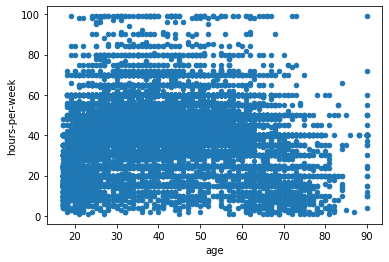

In [2]:
df.plot.scatter('age','hours-per-week')
plt.show()

### Continuous vs. continuous columns
- heatmap

In [3]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(df['age'], df['hours-per-week'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

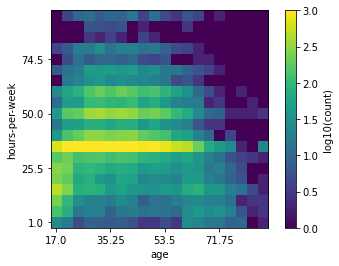

In [4]:
heatmap[heatmap == 0] = 0.1 # this gets rid of division by 0 in the next line
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0,vmax=3) # use log count
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[np.arange(nbins)[::int(nbins/4)]])
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[np.arange(nbins)[::int(nbins/4)]])
plt.colorbar(label='log10(count)')
plt.show()

## Exercise 1
Create a scatter plot and a heat map using the hours-per-week and the education-num columns.

### Categorical vs. categorical columns
- stacked bar plot

In [5]:
count_matrix = df.groupby(['race', 'gross-income']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

gross-income            <=50K      >50K
race                                   
 Amer-Indian-Eskimo  0.884244  0.115756
 Asian-Pac-Islander  0.734360  0.265640
 Black               0.876120  0.123880
 Other               0.907749  0.092251
 White               0.744140  0.255860


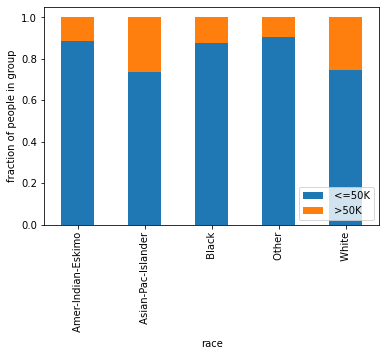

In [6]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

## Exercise 2
Create a stacked bar plot using the sex and the gross-income columns.

### <font color='LIGHTGRAY'>By the end of this talk, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize one column (categorical or continuous data)</font>
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - **visualize multiple columns simultaneously**

#### Scatter matrix

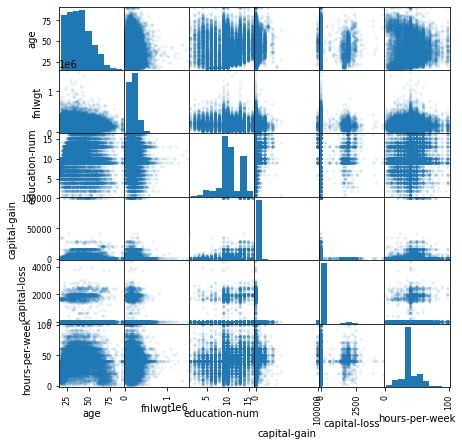

In [7]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(7, 7), marker='o',hist_kwds={'bins': 10}, 
                           s=10, alpha=.1)
plt.show()

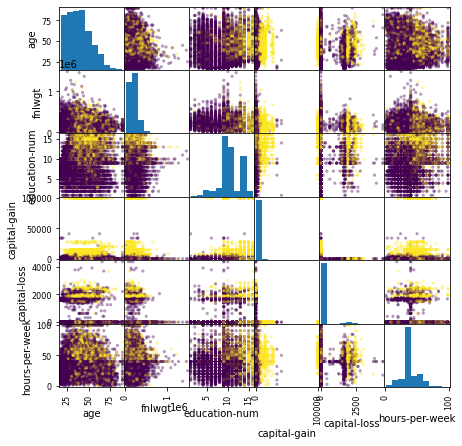

In [8]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(7, 7),c = pd.get_dummies(df['gross-income']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 10}, s=10, alpha=.4)
plt.show()